<a href="https://colab.research.google.com/github/Minch13r/DeepLearn/blob/main/%EC%A0%84%EB%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_2%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 로드 및 전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.utils import to_categorical
import warnings

warnings.filterwarnings('ignore')

# 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/abalone.csv"
df = pd.read_csv(url)

df


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [ ]:
# 'Sex' 컬럼을 숫자로 변환
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# 특성과 레이블 분리
X = df.drop('Rings', axis=1)
y_classification = (df['Rings'] > df['Rings'].mean()).astype(int)  # 평균보다 큰 경우 1, 작은 경우 0으로 분류
y_regression = df['Rings']

# 데이터 분할
X_train, X_test, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.25, random_state=0)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.25, random_state=0)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# CNN 입력 형태 변경
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)

# LSTM 입력 형태 변경
X_train_lstm = X_train_scaled.reshape(-1, 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1])

CNN 모델 정의 및 학습 (분류)

In [ ]:
# CNN 모델 정의 (분류)
cnn_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류를 위한 출력층
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# CNN 모델 학습 (분류)
cnn_model.fit(X_train_cnn, y_train_cls, epochs=10, batch_size=32, validation_split=0.2)

# CNN 모델 평가 (분류)
cnn_pred = cnn_model.predict(X_test_cnn)
cnn_pred_classes = (cnn_pred > 0.5).astype(int).reshape(-1)

print("\n--- CNN Classifier ---")
print("Accuracy:", accuracy_score(y_test_cls, cnn_pred_classes))
print(confusion_matrix(y_test_cls, cnn_pred_classes))


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6911 - loss: 0.5890 - val_accuracy: 0.7384 - val_loss: 0.5160
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.4890 - val_accuracy: 0.7512 - val_loss: 0.4854
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7870 - loss: 0.4636 - val_accuracy: 0.7703 - val_loss: 0.4678
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7919 - loss: 0.4497 - val_accuracy: 0.7719 - val_loss: 0.4634
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7918 - loss: 0.4362 - val_accuracy: 0.7608 - val_loss: 0.4591
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4293 - val_accuracy: 0.7783 - val_loss: 0.4559
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.4222 - val_accuracy: 0.7847 - val_loss: 0.4517
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8227 - loss: 0.3961 - val_accuracy: 0.7815 - val_loss:

LSTM 모델 정의 및 학습 (분류)

In [ ]:
# LSTM 모델 정의 (분류)
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류를 위한 출력층
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# LSTM 모델 학습 (분류)
lstm_model.fit(X_train_lstm, y_train_cls, epochs=10, batch_size=32, validation_split=0.2)

# LSTM 모델 평가 (분류)
lstm_pred = lstm_model.predict(X_test_lstm)
lstm_pred_classes = (lstm_pred > 0.5).astype(int).reshape(-1)

print("\n--- LSTM Classifier ---")
print("Accuracy:", accuracy_score(y_test_cls, lstm_pred_classes))
print(confusion_matrix(y_test_cls, lstm_pred_classes))


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6953 - loss: 0.6345 - val_accuracy: 0.7241 - val_loss: 0.5313
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7362 - loss: 0.5140 - val_accuracy: 0.7305 - val_loss: 0.5194
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7500 - loss: 0.4996 - val_accuracy: 0.7368 - val_loss: 0.5044
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7642 - loss: 0.4984 - val_accuracy: 0.7432 - val_loss: 0.4953
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7773 - loss: 0.4787 - val_accuracy: 0.7656 - val_loss: 0.4783
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7878 - loss: 0.4427 - val_accuracy: 0.7783 - val_loss: 0.4648
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 0.4285 - val_accuracy: 0.7767 - val_loss: 0.4619
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.4246 - val_accuracy: 0.7895 - val_loss:

회귀 모델 정의 및 학습

In [ ]:
# CNN 모델 정의 (회귀)
cnn_reg_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_reg_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)  # 회귀를 위한 출력층
])

cnn_reg_model.compile(optimizer='adam', loss='mean_squared_error')

# CNN 모델 학습 (회귀)
cnn_reg_model.fit(X_train_reg_scaled.reshape(-1, X_train_reg_scaled.shape[1], 1), y_train_reg, epochs=10, batch_size=32, validation_split=0.2)

# CNN 모델 평가 (회귀)
cnn_reg_pred = cnn_reg_model.predict(X_test_reg_scaled.reshape(-1, X_test_reg_scaled.shape[1], 1))
print("\n--- CNN Regressor ---")
print("MSE:", mean_squared_error(y_test_reg, cnn_reg_pred))


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 81.3391 - val_loss: 16.8135
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 14.1270 - val_loss: 10.9177
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10.7433 - val_loss: 8.3861
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0270 - val_loss: 7.1201
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.8727 - val_loss: 6.3763
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.1514 - val_loss: 5.9786
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.4238 - val_loss: 5.7187
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3843 - val_loss: 5.4960
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9636 - val_loss: 5.3377
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0545 - val_loss: 5.2410
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

--- CNN Regressor ---
MSE: 4.990819787669074


시각화

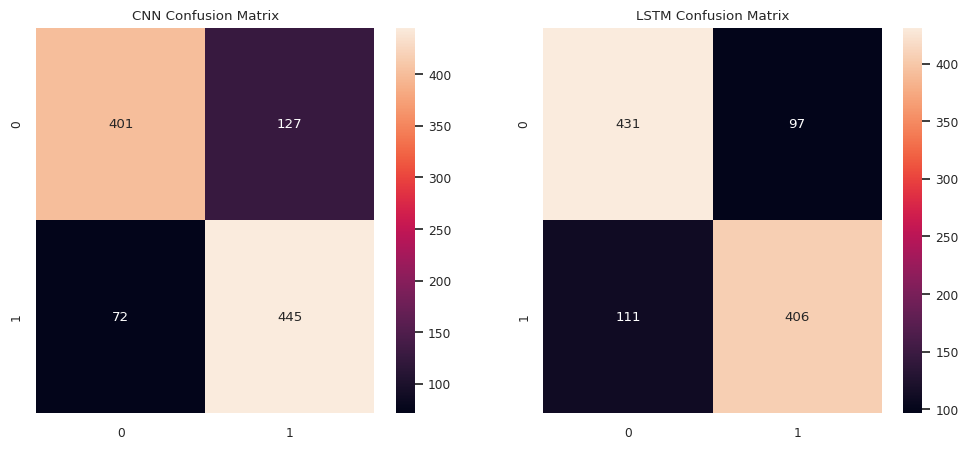

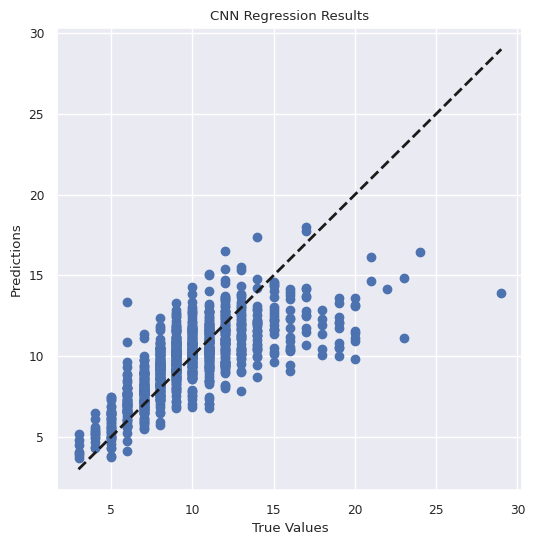

In [ ]:
# 분류 결과 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('CNN Confusion Matrix')
sns.heatmap(confusion_matrix(y_test_cls, cnn_pred_classes), annot=True, fmt='d')

plt.subplot(1, 2, 2)
plt.title('LSTM Confusion Matrix')
sns.heatmap(confusion_matrix(y_test_cls, lstm_pred_classes), annot=True, fmt='d')
plt.show()

# 회귀 결과 시각화
plt.figure(figsize=(6, 6))
plt.scatter(y_test_reg, cnn_reg_pred)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('CNN Regression Results')
plt.show()


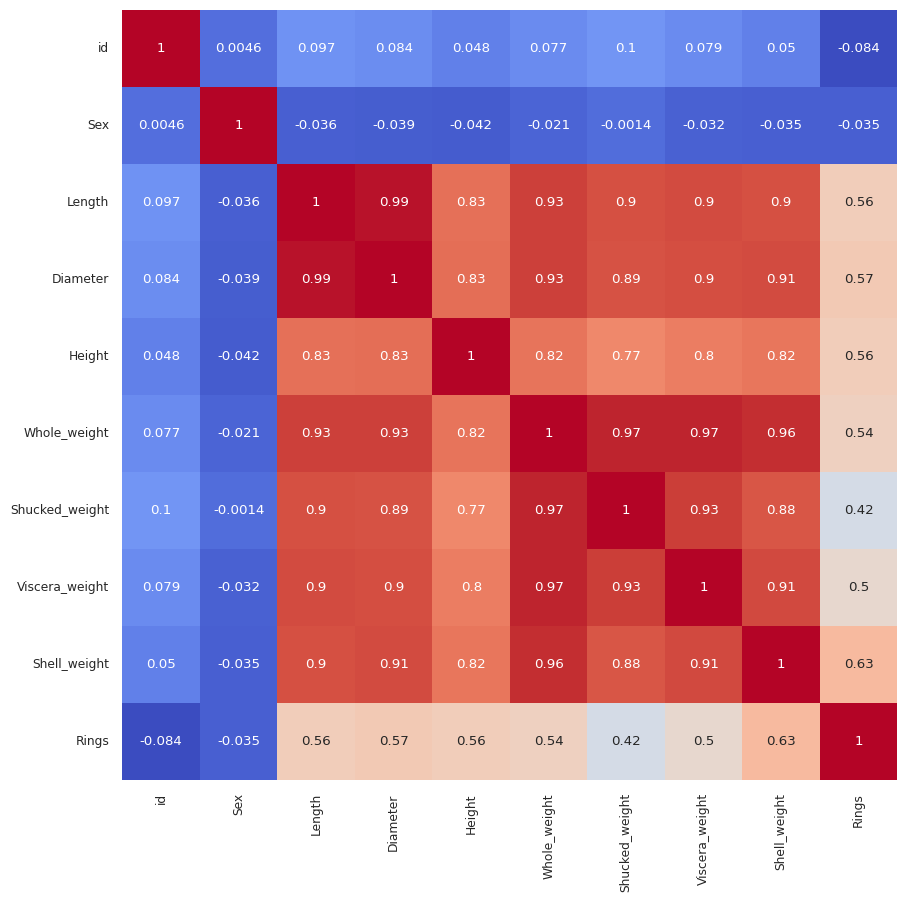

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터프레임 생성
# df = pd.read_csv('your_data.csv')  # 실제 데이터프레임 로드

# 상관 행렬 계산
df_corr = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False, cmap='coolwarm')
plt.show()
